## Preparation

In [3]:
import time
import json
import hmac
import hashlib
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.parse import urljoin, urlencode

In [2]:
type_dict = {
    'open_time': 'int64',
    'open': 'float64',
    'high': 'float64',
    'low': 'float64',
    'close': 'float64',
    'volume': 'float64',
    'quote_asset_volume': 'float64',
    'number_of_trades': 'int32',
    'taker_buy_base_asset_volume': 'float64',
    'taker_buy_quote_asset_volume': 'float64'
}

last_time = 1655892000000
start_time = 1513695600000

In [3]:
first_token = "BTC"
second_token = "BUSD"
perp_token_pair = first_token + second_token
spot_token_pair = first_token + second_token
time_interval = "1h"

save_future_data_path = "../data/raw/future/raw_future_binance_%s_%s_%s.csv" % (first_token.lower(), second_token.lower(), time_interval)
save_spot_data_path = "../data/raw/spot/raw_spot_binance_%s_%s_%s.csv" % (first_token.lower(), second_token.lower(), time_interval)

## Perpetual contract data

In [4]:
API_KEY = "Z0GPxBlUJVbpllNE7F5ywtt7LAFOO7ATNYijsDgNUQezWWYvDliiUOjMeMEYRBI8"
SECRET_KEY = "QHOlbP5fpwWO8DxyWT5LH7OkJ5fED7GSgqZxs91LSqKreUXs1KESBN1SkvFzvLdM"
BASE_URL = 'https://fapi.binance.com'

headers = {
    'X-MBX-APIKEY': API_KEY
}

PATH = '/fapi/v1/klines'

future_data = []

for endTime in range(last_time, start_time, -500*3600000):
    startTime = endTime - 499*3600000
        
    params = {
        'symbol': perp_token_pair,
        'contractType': 'PERPETUAL',
        'interval': '1h',
        'startTime': startTime,
        'endTime': endTime
    }        
    
    temp = []
    
    url = urljoin(BASE_URL, PATH)
    r = requests.get(url, headers=headers, params=params)
    
    if r.status_code == 200:
        temp = list(r.json())
        future_data = temp + future_data

In [5]:
len(future_data)

12628

In [6]:
perp_df = pd.DataFrame(future_data)
perp_df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
perp_df.drop(columns=['close_time', 'ignore'], inplace=True)
perp_df = perp_df.astype(type_dict)
perp_df.drop_duplicates(inplace=True)

if (perp_df["open_time"] - perp_df["open_time"].shift(1) != 3600000.0).sum() == 1:
    print("Data is consistent, the dataframe is saved succesfully!")
    perp_df.to_csv(save_future_data_path)
else:
    print("Data not consistent")

Data is consistent, the dataframe is saved succesfully!


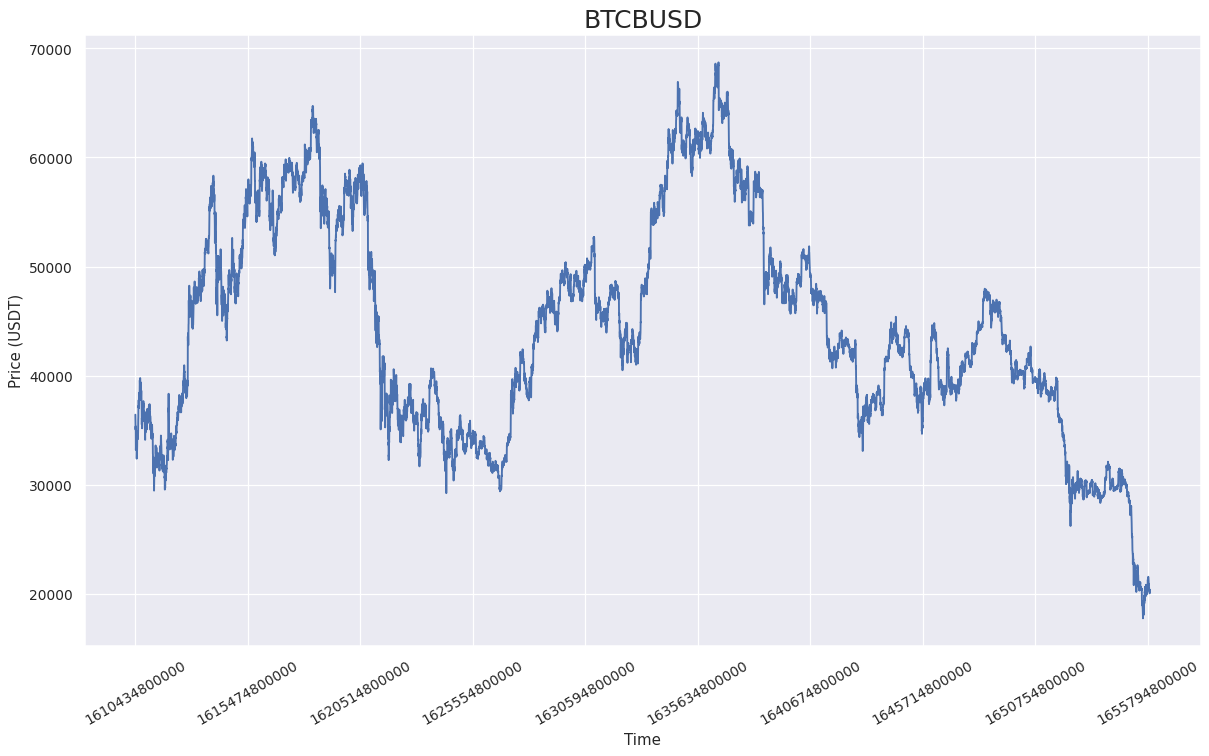

In [7]:
steps = 1400 # Timestamp steps to be shown in the ploting figure

sns.set()

fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(perp_df["close"][:perp_df.shape[0]])

ax.set_title(perp_token_pair, fontsize=20)

ax.set_xticks(range(0,perp_df.shape[0],steps),perp_df['open_time'][:perp_df.shape[0]].loc[::steps],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

## Spot data

In [8]:
API_KEY = "Z0GPxBlUJVbpllNE7F5ywtt7LAFOO7ATNYijsDgNUQezWWYvDliiUOjMeMEYRBI8"
SECRET_KEY = "QHOlbP5fpwWO8DxyWT5LH7OkJ5fED7GSgqZxs91LSqKreUXs1KESBN1SkvFzvLdM"
BASE_URL = 'https://api.binance.com'

headers = {
    'X-MBX-APIKEY': API_KEY
}

PATH = '/api/v3/klines'

spot_data = []

for endTime in range(last_time, start_time, -500*3600000):
    startTime = endTime - 499*3600000
        
    params = {
        'symbol': spot_token_pair,
        'interval': '1h',
        'startTime': startTime,
        'endTime': endTime
    }        
    
    temp = []
    
    url = urljoin(BASE_URL, PATH)
    r = requests.get(url, headers=headers, params=params)
    
    if r.status_code == 200:
        temp = list(r.json())
        spot_data = temp + spot_data

In [9]:
spot_data

[[1568887200000,
  '9881.43000000',
  '9881.43000000',
  '9828.59000000',
  '9849.75000000',
  '0.05688900',
  1568890799999,
  '560.65782142',
  10,
  '0.01979900',
  '195.33354240',
  '0'],
 [1568890800000,
  '9849.75000000',
  '9849.75000000',
  '9849.75000000',
  '9849.75000000',
  '0.00000000',
  1568894399999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1568894400000,
  '9848.41000000',
  '9858.85000000',
  '9848.41000000',
  '9858.85000000',
  '0.02113800',
  1568897999999,
  '208.33128420',
  4,
  '0.01983800',
  '195.52835120',
  '0'],
 [1568898000000,
  '9870.06000000',
  '9887.21000000',
  '9866.53000000',
  '9866.53000000',
  '0.01252500',
  1568901599999,
  '123.60879550',
  3,
  '0.00129000',
  '12.75450090',
  '0'],
 [1568901600000,
  '9866.53000000',
  '9866.53000000',
  '9866.53000000',
  '9866.53000000',
  '0.00000000',
  1568905199999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1568905200000,
  '9866.53000000',
  '9866.53000000'

In [10]:
len(spot_data)

24134

In [11]:
spot_df = pd.DataFrame(spot_data)
spot_df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
spot_df.drop(columns=['close_time', 'ignore'], inplace=True)
spot_df = spot_df.astype(type_dict)
spot_df.drop_duplicates(inplace=True)

if (spot_df["open_time"] - spot_df["open_time"].shift(1) != 3600000).sum() == 1:
    print("Data is consistent, the dataframe is saved succesfully!")
    spot_df.to_csv(save_future_data_path)
else:
    print("Data not consistent, needs to recheck manually!")

Data not consistent, needs to recheck manually!


**Manually check**

In [12]:
timestamp_df = pd.DataFrame(np.arange(spot_df.loc[0,"open_time"], spot_df.loc[spot_df.shape[0]-1,"open_time"]+3600000,3600000))
timestamp_df.columns = ["open_time"]
spot_df = timestamp_df.merge(spot_df, on="open_time", how="left")
spot_df.ffill(inplace=True)

In [13]:
spot_df.isna().sum()

open_time                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [14]:
if (spot_df["open_time"] - spot_df["open_time"].shift(1) != 3600000).sum() == 1:
    print("Data is consistent, the dataframe is saved succesfully!")
    spot_df.to_csv(save_spot_data_path)
else:
    print("Data not consistent, needs to recheck manually!")

Data is consistent, the dataframe is saved succesfully!


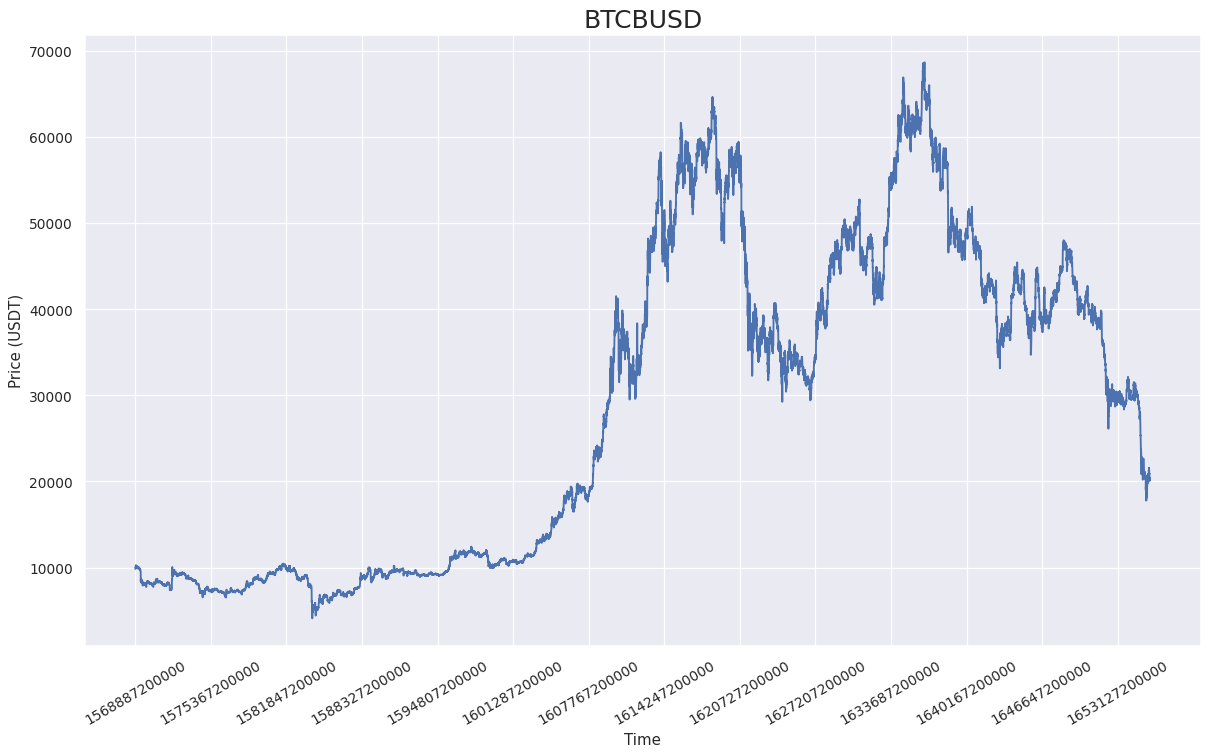

In [15]:
steps = 1800 # Timestamp steps to be shown in the ploting figure

sns.set()

fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(spot_df["close"][:spot_df.shape[0]])

ax.set_title(spot_token_pair, fontsize=20)

ax.set_xticks(range(0,spot_df.shape[0],steps),spot_df['open_time'][:spot_df.shape[0]].loc[::steps],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

## Correlation between spot data and future data

In [16]:
temp_df = spot_df.copy()
temp_perp_df = perp_df.copy()
temp_perp_df.columns = ['perp_' + c for c in temp_perp_df.columns]
temp_perp_df.rename(columns = {
    'perp_open_time': 'open_time'
}, inplace=True)
temp_df = temp_df.merge(temp_perp_df, on='open_time', how='inner')
temp_df.corr()

open_time      open      high       low  \
open_time                           1.000000 -0.319307 -0.324268 -0.313917   
open                               -0.319307  1.000000  0.999643  0.999492   
high                               -0.324268  0.999643  1.000000  0.999247   
low                                -0.313917  0.999492  0.999247  1.000000   
close                              -0.319698  0.999334  0.999650  0.999582   
volume                              0.002575 -0.313060 -0.302118 -0.329489   
quote_asset_volume                 -0.149872 -0.018728 -0.006064 -0.038096   
number_of_trades                   -0.208356 -0.040357 -0.027362 -0.059511   
taker_buy_base_asset_volume         0.000394 -0.317622 -0.305188 -0.332205   
taker_buy_quote_asset_volume       -0.152414 -0.024250 -0.009781 -0.041317   
perp_open                          -0.320588  0.999993  0.999646  0.999478   
perp_high                          -0.325716  0.999560  0.999949  0.999156   
perp_low                           -0.314918  0.999389  0.999147  0.999944   
perp_close                         -0.320920  0.999331  0.999654  0.999570   
perp_volume                         0.497144 -0.315377 -0.311802 -0.320167   
perp_quote_asset_volume             0.502725 -0.117720 -0.113274 -0.123996   
perp_number_of_trades               0.561463 -0.212032 -0.207655 -0.218132   
perp_taker_buy_base_asset_volume    0.496105 -0.317991 -0.313996 -0.322257   
perp_taker_buy_quote_asset_volume   0.504420 -0.123085 -0.118082 -0.128685   

                                      close    volume  quote_asset_volume  \
open_time                         -0.319698  0.002575           -0.149872   
open                               0.999334 -0.313060           -0.018728   
high                               0.999650 -0.302118           -0.006064   
low                                0.999582 -0.329489           -0.038096   
close                              1.000000 -0.315032           -0.021013   
volume                            -0.315032  1.000000            0.913394   
quote_asset_volume                -0.021013  0.913394            1.000000   
number_of_trades                  -0.042450  0.890451            0.941970   
taker_buy_base_asset_volume       -0.316879  0.989981            0.902880   
taker_buy_quote_asset_volume      -0.023209  0.901244            0.986401   
perp_open                          0.999328 -0.312565           -0.018241   
perp_high                          0.999582 -0.301138           -0.005010   
perp_low                           0.999499 -0.329927           -0.038761   
perp_close                         0.999994 -0.314520           -0.020508   
perp_volume                       -0.316073  0.634084            0.437539   
perp_quote_asset_volume           -0.118484  0.545424            0.471068   
perp_number_of_trades             -0.212842  0.563037            0.450326   
perp_taker_buy_base_asset_volume  -0.317920  0.632098            0.433585   
perp_taker_buy_quote_asset_volume -0.122853  0.545251            0.467630   

                                   number_of_trades  \
open_time                                 -0.208356   
open                                      -0.040357   
high                                      -0.027362   
low                                       -0.059511   
close                                     -0.042450   
volume                                     0.890451   
quote_asset_volume                         0.941970   
number_of_trades                           1.000000   
taker_buy_base_asset_volume                0.883052   
taker_buy_quote_asset_volume               0.931722   
perp_open                                 -0.039730   
perp_high                                 -0.026170   
perp_low                                  -0.059963   
perp_close                                -0.041805   
perp_volume                                0.470319   
perp_quote_asset_volume                    0.467177  

### Label check between spot data and perp data

In [16]:
perp_df = pd.read_csv(save_future_data_path)
spot_df = pd.read_csv(save_spot_data_path)

In [17]:
test_perp_df = perp_df[["open_time","close", "open"]]
test_perp_df.columns=["open_time","perp_close", "perp_open"]

In [18]:
test_spot_df = spot_df.iloc[-perp_df.shape[0]:,:][["open_time","close","open"]]
test_spot_df.columns=["open_time", "spot_close", "spot_open"]

In [19]:
merge_df = test_perp_df.merge(test_spot_df, on="open_time")

In [20]:
merge_df["diff_perp"] = merge_df["perp_close"] - merge_df["perp_open"]
merge_df["diff_spot"] = merge_df["spot_close"] - merge_df["spot_open"]

In [21]:
merge_df

open_time  perp_close  perp_open  spot_close  spot_open  diff_perp  \
0      1610434800000     36433.4    36060.5    36452.84   36026.67      372.9   
1      1610438400000     35778.9    36453.3    35814.68   36447.10     -674.4   
2      1610442000000     35935.4    35787.8    35970.72   35814.67      147.6   
3      1610445600000     35061.2    35924.4    35133.40   35970.23     -863.2   
4      1610449200000     35369.2    35138.1    35451.00   35127.34      231.1   
...              ...         ...        ...         ...        ...        ...   
12623  1655877600000     20078.2    20336.2    20103.50   20359.60     -258.0   
12624  1655881200000     20063.3    20080.9    20091.60   20103.60      -17.6   
12625  1655884800000     20199.9    20063.3    20226.20   20091.60      136.6   
12626  1655888400000     20390.3    20202.9    20415.70   20226.40      187.4   
12627  1655892000000     20384.2    20390.4    20410.40   20415.70       -6.2   

       diff_spot  
0         426.17  
1        -632.42  
2         156.05  
3        -836.83  
4         323.66  
...          ...  
12623    -256.10  
12624     -12.00  
12625     134.60  
12626     189.30  
12627      -5.30  

[12628 rows x 7 columns]

In [22]:
(merge_df["diff_perp"] * merge_df["diff_spot"] >= 0).sum()

12429

In [23]:
merge_df.shape[0]

12628

In [24]:
print("Rate of equivalent label:", (merge_df["diff_perp"] * merge_df["diff_spot"] >= 0).sum()/merge_df.shape[0])

Rate of equivalent label: 0.9842413683877098
